## Last Update: 2020-6-23
2020-06-17 File Created <br>
2020-06-17 Run fsps <br>
2020-06-23 Find parameters range, creat saving method <br> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fsps 
import sedpy

import time

import astropy.units as u
from astropy.io import ascii
from astropy.constants import c, L_sun, pc
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D, SpectralRegion
from astropy.table import Table, Column

In [2]:
#Functions:

# parameter gaussian generator: Gaussian => N random number

# single sps: parameters => SED => SDSS filters => color
# Parameter => SDSS Color
# Parameter => SED => EW

# multi sps: single sps x N => color plot, EW plot
# sdss: SDSS color, EW
# error: (fsps, sdss) => error value

## Random Gaussian Generator

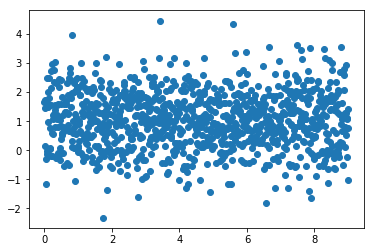

In [3]:
n = 1000
x = np.linspace(0,9,n)
y = np.random.normal(1,1,n)
plt.scatter(x,y)

## Parameter Ranges

In [ ]:
# emission
esp = fsps.StellarPopulation(zcontinuous=1, add_neb_emission=1)

In [49]:
# Constants: 
redshift= 0.05
age_mea = 13.7 #age_st<age_en in Gyr
sdss_bands = fsps.find_filter('SDSS')


# Variables: 
age_st = 12.7
metal=-0.8 #0=1.0  /-0.2218=0.6   /-0.522=0.3   /-1=0.1
ion = -2.5
SFR = 0.1 #fraction of mass formed in a constant mode of SF
eftime = 100 #e-folding time

In [50]:
# set redshift
#esp.params['zred'] = redshift

# set parameter for star model
esp.params['imf_type'] = 2 #milky way

# set masscut
#esp.params['masscut'] = 0. #Defualt is 150.

# set stellar metallicity
esp.params['logzsol'] = metal
# set parameters for nebular model
esp.params['gas_logz'] = metal # gas metallicity
esp.params['gas_logu'] = ion # ionization parameter

#SFH setting
esp.params['sfh'] = 1 #six parameter SFH
esp.params['tau'] = eftime #e-folding time: μ=e^(-t/τ)
esp.params['const'] = SFR #fraction of mass formed in a constant mode of SF
esp.params['sf_start'] = age_st #1Gyr

In [51]:
esp.get_mags(tage=age_mea, bands=sdss_bands)

array([3.4328946 , 2.92158359, 2.92904814, 3.12344454, 3.09328085])